In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.getenv('HW_FUZZING') + "/scripts")

In [2]:
# Load VCD data
vcd_data_file_a = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data/exp002a_confirm_target_convergence/out/aflgo_1ttemins_10mins_1/vcd/data.json"
vcd_data_file_b = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data/exp002b_confirm_target_convergence/out/aflgo_10ttemins_60mins_1/vcd/data.json"
vcd_df_a = pd.read_json(vcd_data_file_a)
vcd_df_b = pd.read_json(vcd_data_file_b)

In [3]:
# Load Log Data
log_file_a = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data/exp002a_confirm_target_convergence/logs/aflgo_1ttemins_10mins_1.err.log"
log_file_b = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/circuits/double_counter/data/exp002b_confirm_target_convergence/logs/aflgo_10ttemins_60mins_1.err.log"
log_df_a = pd.read_csv(log_file_a, header=0, skipinitialspace=True)
log_df_b = pd.read_csv(log_file_b, header=0, skipinitialspace=True)

Saving plot to: /usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp002_confirm_target_convergence.pdf


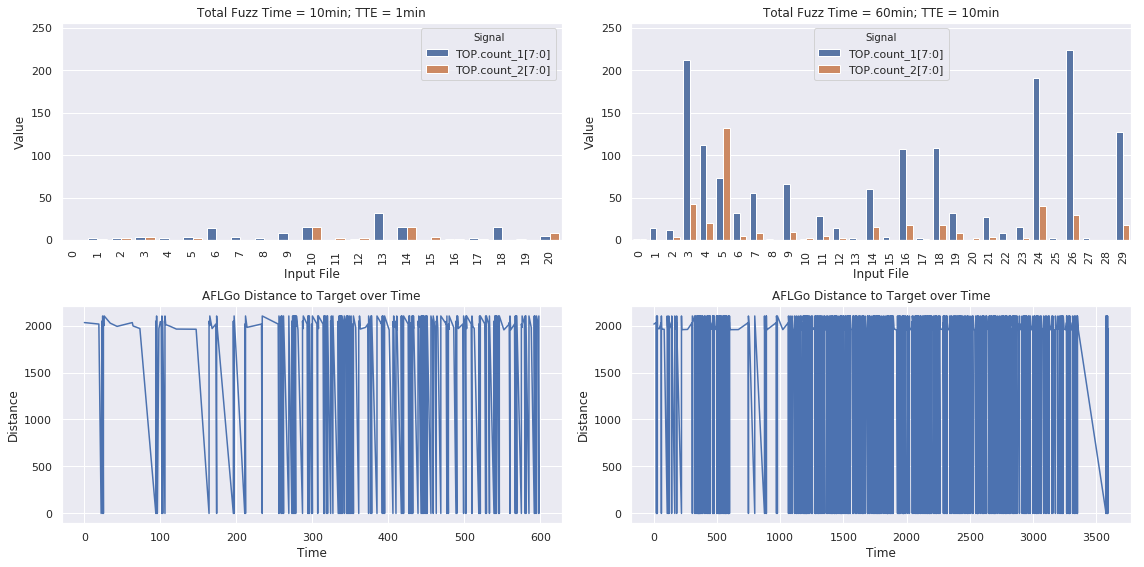

In [4]:
# Plot data
sns.set()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8));

# Plot Register Counts
sns.barplot(x="Input File", y="Value", hue="Signal", data=vcd_df_a, ax=ax1)
sns.barplot(x="Input File", y="Value", hue="Signal", data=vcd_df_b, ax=ax2)
ax1.set_ylim([0, 256])
ax2.set_ylim([0, 256])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
ax1.set_title("Total Fuzz Time = 10min; TTE = 1min")
ax2.set_title("Total Fuzz Time = 60min; TTE = 10min")

# Plot Distance Convergence
# sns.lineplot(x=log_df_a["Time"], y=log_df_a["Max. Distance"], ax=ax3, estimator=None)
sns.lineplot(x=log_df_a["Time"], y=log_df_a["Distance"], ax=ax3, estimator=None)
# sns.lineplot(x=log_df_a["Time"], y=log_df_a["Min. Distance"], ax=ax3, estimator=None)
# sns.lineplot(x=log_df_b["Time"], y=log_df_b["Max. Distance"], ax=ax4, estimator=None)
sns.lineplot(x=log_df_b["Time"], y=log_df_b["Distance"], ax=ax4, estimator=None)
# sns.lineplot(x=log_df_b["Time"], y=log_df_b["Min. Distance"], ax=ax4, estimator=None)
ax3.set_title("AFLGo Distance to Target over Time")
ax4.set_title("AFLGo Distance to Target over Time")
# ax3.legend(["Max. Distance", "Current Distance", "Min. Distance"])
# ax4.legend(["Max. Distance", "Current Distance", "Min. Distance"])

# Adjust layout of subplots to fit
plt.tight_layout();

# Save Plot as a PDF
plot_filename = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/plots/exp002_confirm_target_convergence.pdf"
print("Saving plot to:", plot_filename)
plt.savefig(plot_filename, format='pdf');

In [ ]:
# Example Input File
# <byte> --> LSB fed to *select* input bit
# <byte>
# <byte>
# <byte>
# <byte>
# <byte>
# .
# .
# .
# <byte>